In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

df = pd.read_csv("Companies_ranked_by_Dividend_Yield.csv")

print(df.head())
print(df.info())


   Rank                     Name    Symbol  dividend_yield_ttm  price (GBP)  \
0     1                  LianBio      LIAN            300940.0     0.243065   
1     2           Richter Gedeon    RIG2.F            150430.0    23.726825   
2     3              Delek Group  DLEKG.TA            117114.0    87.735884   
3     4  LMP Automotive Holdings      LMPX            106250.0     0.121914   
4     5                     MBIA       MBI             22346.4     2.727817   

         country  
0  United States  
1        Hungary  
2         Israel  
3  United States  
4  United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                9912 non-null   int64  
 1   Name                9912 non-null   object 
 2   Symbol              9911 non-null   object 
 3   dividend_yield_ttm  9912 non-null   float64
 4   price 

In [36]:
df_cleaned = df.dropna()

encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
encoded_country = encoder.fit_transform(df_cleaned[['country']])

encoded_country_df = pd.DataFrame(encoded_country, columns=encoder.get_feature_names_out(['country']))

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[['dividend_yield_ttm', 'price (GBP)']])

scaled_features_df = pd.DataFrame(scaled_features, columns=['dividend_yield_ttm_scaled', 'price_scaled'])

df_processed = pd.concat([df_cleaned[['Rank', 'Name', 'Symbol']], encoded_country_df, scaled_features_df], axis=1)

print(df_processed.head())

   Rank                     Name    Symbol  country_Australia  \
0   1.0                  LianBio      LIAN                0.0   
1   2.0           Richter Gedeon    RIG2.F                0.0   
2   3.0              Delek Group  DLEKG.TA                0.0   
3   4.0  LMP Automotive Holdings      LMPX                0.0   
4   5.0                     MBIA       MBI                0.0   

   country_Austria  country_Bahamas  country_Bahrain  country_Belgium  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   country_Bermuda  country_Brazil  ...  country_Thailand  country_Turkey  \
0              0.0             0.0  ...               0.0             0.0   
1              0

Index(['Rank', 'Name', 'Symbol', 'dividend_yield_ttm', 'price (GBP)',
       'country'],
      dtype='object')
              Rank  dividend_yield_ttm   price (GBP)
count  9909.000000         9909.000000   9909.000000
mean   4956.298315          240.594829     53.476686
std    2861.598676         3761.959382    359.832485
min       1.000000            0.000000      0.000000
25%    2479.000000            0.000000      2.005959
50%    4956.000000            0.000000      8.552696
75%    7434.000000          234.553000     28.817327
max    9912.000000       300940.000000  16549.695004
                    dividend_yield_ttm  price (GBP)
dividend_yield_ttm            1.000000    -0.004218
price (GBP)                  -0.004218     1.000000


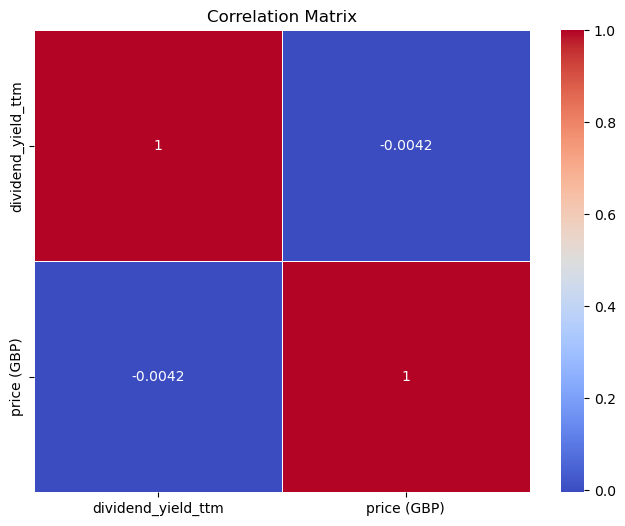

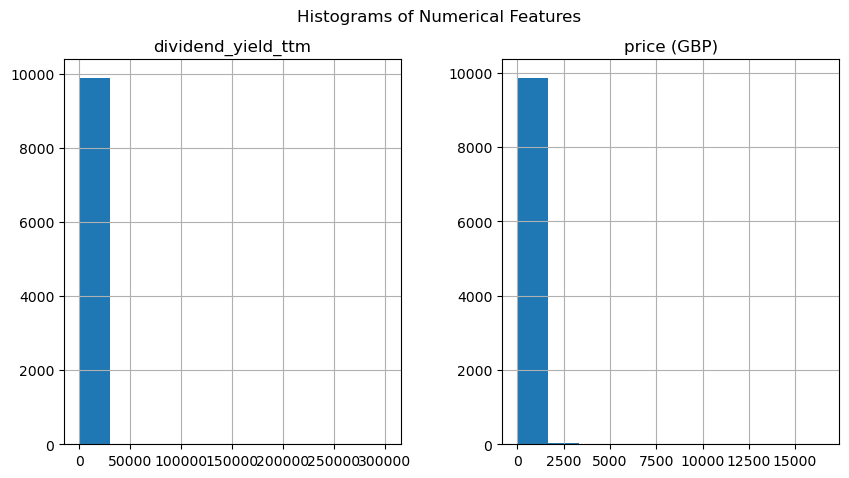

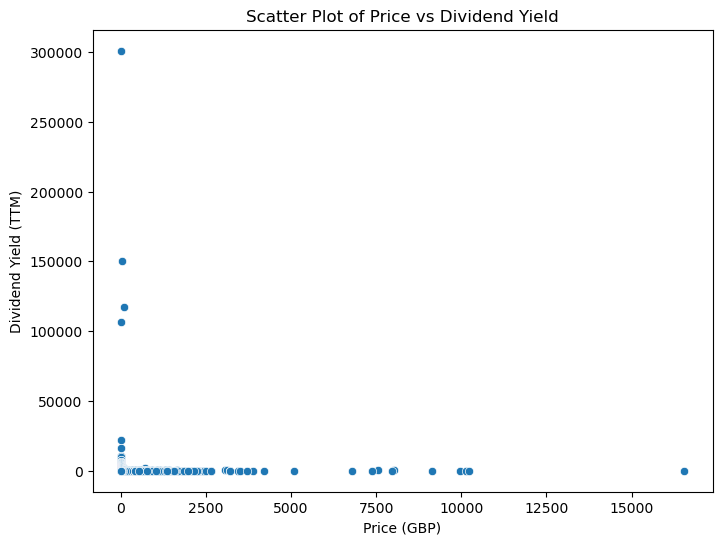

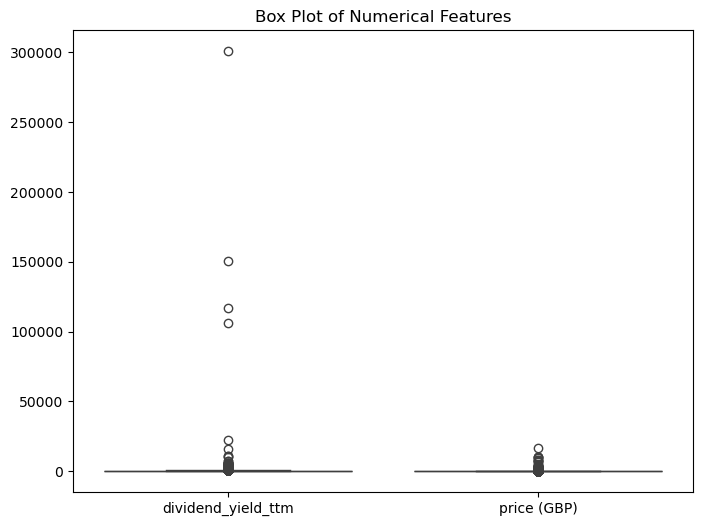

In [24]:
# 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv("Companies_ranked_by_Dividend_Yield.csv").dropna()

print(df_cleaned.columns)

print(df_cleaned.describe())

correlation_matrix = df_cleaned[['dividend_yield_ttm', 'price (GBP)']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

df_cleaned[['dividend_yield_ttm', 'price (GBP)']].hist(bins=10, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price (GBP)', y='dividend_yield_ttm', data=df_cleaned)
plt.title('Scatter Plot of Price vs Dividend Yield')
plt.xlabel('Price (GBP)')
plt.ylabel('Dividend Yield (TTM)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned[['dividend_yield_ttm', 'price (GBP)']])
plt.title('Box Plot of Numerical Features')
plt.show()

   Rank                     Name    Symbol  dividend_yield_ttm  price (GBP)  \
0     1                  LianBio      LIAN            300940.0     0.243065   
1     2           Richter Gedeon    RIG2.F            150430.0    23.726825   
2     3              Delek Group  DLEKG.TA            117114.0    87.735884   
3     4  LMP Automotive Holdings      LMPX            106250.0     0.121914   
4     5                     MBIA       MBI             22346.4     2.727817   

         country  
0  United States  
1        Hungary  
2         Israel  
3  United States  
4  United States  
Index(['Rank', 'Name', 'Symbol', 'dividend_yield_ttm', 'price (GBP)',
       'country'],
      dtype='object')
                    dividend_yield_ttm  price (GBP)
dividend_yield_ttm            1.000000    -0.004218
price (GBP)                  -0.004218     1.000000


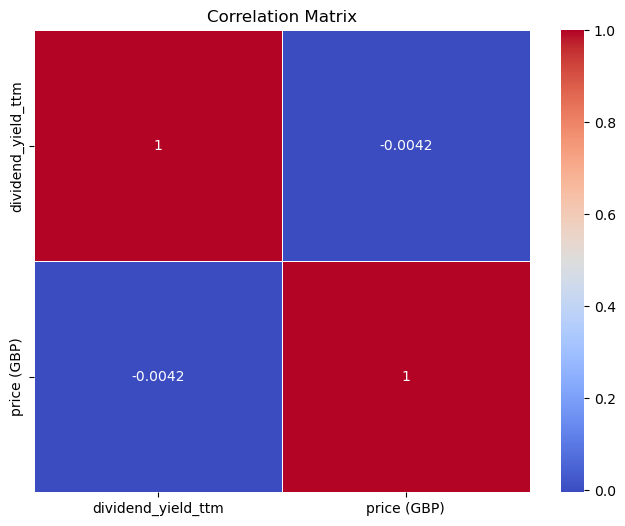

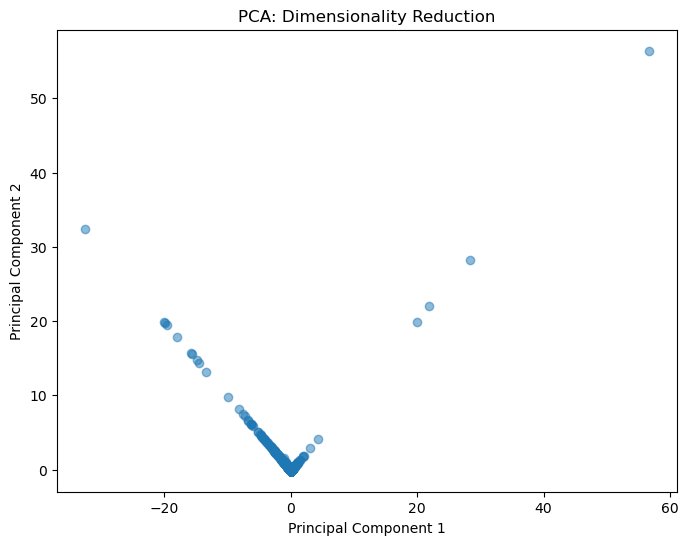

Explained variance ratio: [0.5021089 0.4978911]
Total explained variance: 1.0


In [26]:
# 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_cleaned = pd.read_csv("Companies_ranked_by_Dividend_Yield.csv").dropna()

print(df_cleaned.head())
print(df_cleaned.columns)

correlation_matrix = df_cleaned[['dividend_yield_ttm', 'price (GBP)']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[['dividend_yield_ttm', 'price (GBP)']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total explained variance:', np.sum(pca.explained_variance_ratio_))

In [30]:
# 5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

df_cleaned = pd.read_csv('Companies_ranked_by_Dividend_Yield.csv').dropna()

label_encoder = LabelEncoder()
df_cleaned['country_encoded'] = label_encoder.fit_transform(df_cleaned['country'])

X = df_cleaned[['dividend_yield_ttm', 'price (GBP)']]  
y = df_cleaned['country_encoded']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, average='weighted')}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_tree, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_tree, average='weighted')}")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression Performance:
Accuracy: 0.36461486713757146
Precision: 0.1338849056515956
Recall: 0.36461486713757146

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00       104
           2       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        22
          10       0.00      0.00      0.00       162
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       105
          14       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00        19
          21       0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [34]:
# 6
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nSupport Vector Machine (SVM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted')}")
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("\nLogistic Regression Performance (from previous step):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, average='weighted')}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("\nDecision Tree Performance (from previous step):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_tree, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_tree, average='weighted')}")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))



Random Forest Performance:
Accuracy: 0.2714429868819374
Precision: 0.23287867549607824
Recall: 0.2714429868819374

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.13      0.12      0.12       104
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         0
          10       0.06      0.03      0.04       162
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.07      0.05      0.06       105
          14       0.00      0.00      0.00         2
          16       0.00      0.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s